2021-06-15 01:09:44,337 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: us-south


<AxesSubplot:xlabel='Dates', ylabel='Comments'>

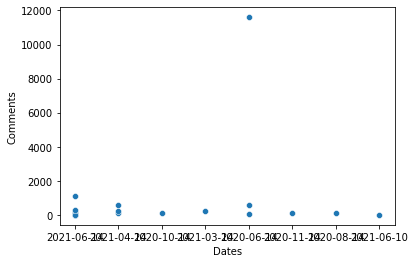

In [7]:
import seaborn
import pandas as pd
from lithops import Storage
from io import BytesIO

storage=Storage()
bucket='cloudbuttonhackathon'
data=storage.get_object(bucket, "webs.csv")
csv = pd.read_csv(BytesIO(data))

#get comments/dates plot
seaborn.scatterplot(x="Dates", y="Comments", data=csv)

2021-06-15 01:10:03,507 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: us-south


<AxesSubplot:xlabel='Dates', ylabel='Votes'>

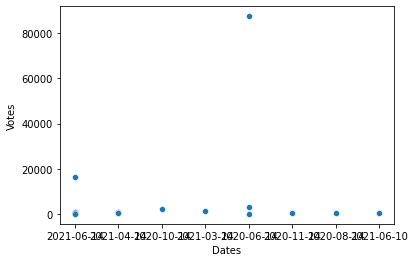

In [9]:
import seaborn
import pandas as pd
from lithops import Storage
from io import BytesIO

storage=Storage()
bucket='cloudbuttonhackathon'
data=storage.get_object(bucket, "webs.csv")
csv = pd.read_csv(BytesIO(data))

#get votes/dates plot
seaborn.scatterplot(x="Dates", y="Votes", data=csv)

2021-06-15 01:09:52,155 [INFO] lithops.config -- Lithops v2.3.3
2021-06-15 01:09:52,173 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: us-south
2021-06-15 01:09:52,174 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: us-south - Namespace: adria.torija@estudiants.urv.cat_dev
2021-06-15 01:09:52,176 [INFO] lithops.executors -- Serverless Executor created with ID: 665165-1
2021-06-15 01:09:52,177 [INFO] lithops.invokers -- ExecutorID 665165-1 | JobID M000 - Selected Runtime: hatori9/dockersd:sdprac2c - 256MB
2021-06-15 01:09:52,183 [INFO] lithops.job.job -- ExecutorID 665165-1 | JobID M000 - Uploading function and data - Total: 1.5KiB
2021-06-15 01:09:53,351 [INFO] lithops.invokers -- ExecutorID 665165-1 | JobID M000 - Starting function invocation: None() - Total: 1 activations
2021-06-15 01:09:53,353 [INFO] lithops.invokers -- ExecutorID 665165-1 | JobID M000 - View execution logs at C:\Users\arubu\AppData\Lo

<AxesSubplot:xlabel='0', ylabel='1'>

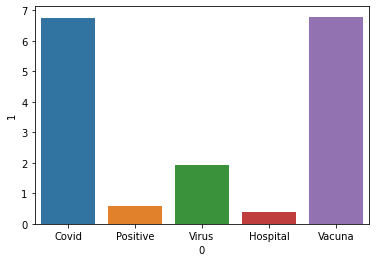

In [8]:
import seaborn
import pandas as pd
from lithops import Storage
from lithops.multiprocessing import Pool
from io import BytesIO
import statistics

def WordCounting():
    storage=Storage()
    bucket='cloudbuttonhackathon'
    data=storage.get_object(bucket, "webs.csv")
    df = pd.read_csv(BytesIO(data))
    covid= ['Covid', 'covid19', 'Coronavirus', 'COVID-19', 'COVID']
    virus = ['virus']
    vacuna = ['vaccine', 'Vaccine', 'astrazeneca', 'AstraZeneca']
    positiu = ['positive', 'Positive']
    hospital = ['Hospital', 'hospital']
    cov=[]
    vir=[]
    pos=[]
    vac=[]
    hos=[]
    texts=df["Text"]
    i=0
    for a in texts: #get common words
            texto=a.split()
            cov.append(0)
            vir.append(0)
            pos.append(0)
            vac.append(0)
            hos.append(0)
            for b in texto:
                if b in covid:
                    cov[i]=cov[i]+1 
                if b in virus:
                    vir[i]=vir[i]+1 
                if b in positiu:
                    pos[i]=pos[i]+1
                if b in vacuna:
                    vac[i]=vac[i]+1 
                if b in hospital:
                    hos[i]=hos[i]+1                  
            i=i+1
    words=[cov,pos,vir,hos,vac]
    return words

with Pool() as pool:
    list=pool.starmap(WordCounting,[()])

dict={
    "Covid": statistics.mean(list[0][0]),
    "Positive": statistics.mean(list[0][1]),
    "Virus": statistics.mean(list[0][2]),
    "Hospital": statistics.mean(list[0][3]),
    "Vacuna": statistics.mean(list[0][4])
    }

words=pd.DataFrame(dict.items())
seaborn.barplot(x=0, y=1, data=words)

2021-06-15 01:10:10,626 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: us-south
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arubu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<AxesSubplot:xlabel='0', ylabel='1'>

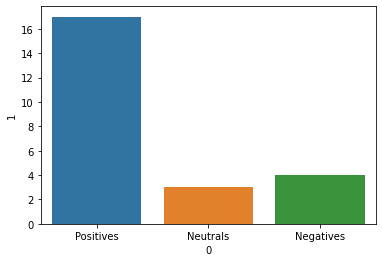

In [10]:
import seaborn
import pandas as pd
import nltk
from lithops import Storage
from io import BytesIO
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from googletrans import Translator

def feelings():
    storage=Storage()
    bucket='cloudbuttonhackathon'
    data=storage.get_object(bucket, "webs.csv")
    df = pd.read_csv(BytesIO(data))
    nltk.download('vader_lexicon')
    translator = Translator()
    analyzer = SentimentIntensityAnalyzer()
    pos, neg, neu = 0, 0, 0
    positive, neutral, negative = [], [], []
    for text in (df["Text"]):
        aux=text
        try:
            text=translator.translate(text,dest="en").text
        except:
            text=aux
        vs = analyzer.polarity_scores(str(text))
    #polary = analyzer.polarity_scores()
        if vs['compound'] >= 0.4:
            pos += 1
            if (text) not in positive:
                positive.append(text)
        elif vs['compound'] < 0.4 and vs['compound'] > -0.4:
            neu += 1
            if (text) not in neutral:
                neutral.append((text))
        else:
            neg += 1
            if (text) not in negative:
                negative.append(text)
    dict=[pos,neu,neg]

    return dict

feel=feelings()
pd.DataFrame(feel)
aux={
    "Positives":feel[0],
    "Neutrals":feel[1],
    "Negatives":feel[2],        
    }
feeel=pd.DataFrame(aux.items())
#get feelings plot
seaborn.barplot(x=0, y=1, data=feeel)